$$\Huge\textbf{Data Mining}$$

$$\Large\textbf{Wine Analysis}$$

$$\Large\textbf{Daniel Elston}$$

$$\newline$$

In [1]:
import textwrap
import pandas as pd
import numpy as np
import sklearn.impute as ski
import scipy.stats as sci
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import svd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA as pca
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.manifold import MDS
from scipy.spatial import distance_matrix
from scipy.spatial import distance

$\large\textbf{Section 1: Data Load in}$

In [2]:
data = load_wine()

In [3]:
df23 = pd.DataFrame(data.data, columns=data.feature_names)
df23

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
df23['target'] = pd.Series(data.target)
tg = df23['target']
tg

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

The target frequency occurs 178 times.

In [5]:
df23['target'].value_counts(normalize=False).sum()

178

$$\newline$$

$\large\textbf{Section 2: Univariate and Multivariate Summaries}$

Here I compute uni and multivariate summaries using summary statistics for univariant and correlation matrix for multivariate.

In [6]:
target_group =  df23.groupby(tg)['target']
target_group

In [7]:
display(df23.describe().round(2))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,2.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


In [8]:
print("\nCorrelation coefficients:")
display(df23.corr())


Correlation coefficients:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


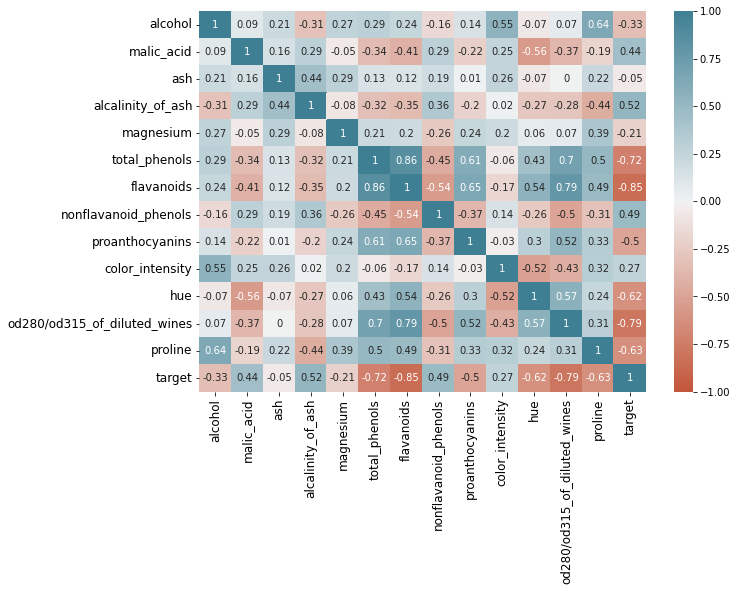

In [9]:
fig,ax = plt.subplots(1,1, figsize=(10,7))
sns.heatmap(df23.corr().round(2), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 10})
_y = plt.yticks(rotation=0, fontsize=12)
_x = plt.xticks(rotation=90, fontsize=12)

In [10]:
print('Grouping by Target variable and computing the Median:')
gb_target = df23.groupby(tg).median()
gb_target


Grouping by Target variable and computing the Median:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
1,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
2,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


$$\newline$$

$\large\textbf{Section 3: Outliers and Box Plots}$

Here is the box plots for target groups relation to alcohol.

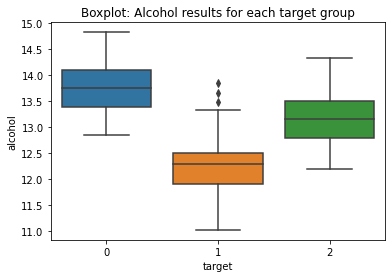

In [11]:
ax = sns.boxplot(x=tg, y=df23['alcohol'], data=df23)
plt.title('Boxplot: Alcohol results for each target group')

ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])
plt.show()

$$\newline$$

$\large\textbf{Section 4: High Correlation Analysis}$

Here I start by looking for the variables with the highest correlation. I accomplish this by first computing and a correlation matrix and feature names. 

In [12]:
cc = df23.corr()
cc

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [13]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, alcohol to target
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       14 non-null     float64
 1   malic_acid                    14 non-null     float64
 2   ash                           14 non-null     float64
 3   alcalinity_of_ash             14 non-null     float64
 4   magnesium                     14 non-null     float64
 5   total_phenols                 14 non-null     float64
 6   flavanoids                    14 non-null     float64
 7   nonflavanoid_phenols          14 non-null     float64
 8   proanthocyanins               14 non-null     float64
 9   color_intensity               14 non-null     float64
 10  hue                           14 non-null     float64
 11  od280/od315_of_diluted_wines  14 non-null     float64
 12  proline                       14 non-null     float64
 13  ta

I know I have 14 columns, resulting in 196 correlation values. 14 of these will be correlations of variables with their selfs (equal to 1), so these need to be removed.

In [14]:
tot_vals = 14*14
remove_id_corr = tot_vals - 14
remove_id_corr

182

I now sort the resultant values, and can see the most positively and negatively correlated values.

In [15]:
s = cc.unstack()
so = s.sort_values(kind="quicksort")
so[0:remove_id_corr]

flavanoids                    target                         -0.847498
target                        flavanoids                     -0.847498
od280/od315_of_diluted_wines  target                         -0.788230
target                        od280/od315_of_diluted_wines   -0.788230
                              total_phenols                  -0.719163
                                                                ...   
total_phenols                 od280/od315_of_diluted_wines    0.699949
od280/od315_of_diluted_wines  flavanoids                      0.787194
flavanoids                    od280/od315_of_diluted_wines    0.787194
                              total_phenols                   0.864564
total_phenols                 flavanoids                      0.864564
Length: 182, dtype: float64

From the above analysis we can see that the variables with the highest positive correlation are total_phenols and flavanoids.

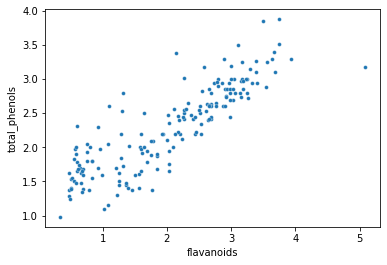

In [16]:
sns.scatterplot(x=df23['flavanoids'], y=df23['total_phenols'], s=15)

The above plot has some outliers, so these will now be removed.

In [17]:
outliers_tp = df23.loc[(df23['total_phenols']>= df23['total_phenols'].max()-2*df23.total_phenols.std())]
outliers_tp2 = df23.loc[(df23['total_phenols']<= 2*df23.total_phenols.std())]

In [18]:
outliers_f = df23.loc[(df23['flavanoids']>= df23['flavanoids'].max()-2*df23.flavanoids.std())]
outliers_f2 = df23.loc[(df23['flavanoids']<= 2*df23.flavanoids.std())]

In [19]:
outliers_tpf = df23.loc[
    (df23['total_phenols']<= 2*df23.total_phenols.std()) +
    (df23['flavanoids']>= df23['flavanoids'].max()-2*df23.flavanoids.std())
]
outliers_tpf

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.030,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.860,3.45,1480.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.050,2.85,1450.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.010,3.55,1045.0,0
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.250,3.17,1510.0,0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.250,2.73,1150.0,0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.200,3.00,1547.0,0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.070,2.65,1280.0,0
17,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.130,2.57,1130.0,0
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.230,2.82,1680.0,0


In [20]:
df23_drop = df23.drop(outliers_tpf.index)
df23_drop

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


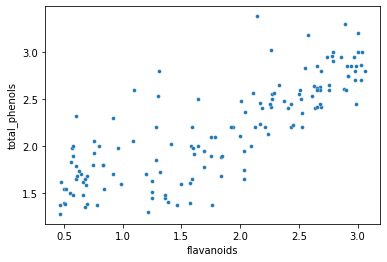

In [21]:
sns.scatterplot(x=df23_drop['flavanoids'], y=df23_drop['total_phenols'], s=15)

There can be seen a strong positive correlation between total_phenols and flavanoids.

$$\newline$$

$\large\textbf{Section 5: Multidimensional Scaling}$

Excluding the target feature

In [22]:
df23_drop2 = df23.drop(gb_target.index)
df23_drop2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Standardizing the remaining features

In [23]:
df23_drop2_z = sci.zscore(df23_drop2.iloc[:, 0:-1])
df23_drop2_z

array([[ 1.69998187, -0.3503342 ,  0.48942404, ..., -0.41824432,
         1.21370018,  2.36039672],
       [ 0.3064097 ,  0.22022608,  1.83794348, ...,  0.3656838 ,
         0.47423368, -0.01864917],
       [ 1.49032942, -0.51971928,  0.30719169, ...,  0.40923536,
         0.3604696 ,  2.26459621],
       ...,
       [ 0.34340719,  1.7268618 , -0.38529127, ..., -1.59413649,
        -1.47397614,  0.30068585],
       [ 0.22008222,  0.22022608,  0.01561992, ..., -1.55058493,
        -1.38865308,  0.3166526 ],
       [ 1.40400194,  1.56639172,  1.36413935, ..., -1.50703337,
        -1.4170941 , -0.57748545]])

Multidimensional scaling using PCA is now shown below. Firstly, the covariant matrix is computed. Then, the explained variance showing a significant proportion of the data is lost to scaling.

In [24]:
print("Covariance matrix:")
features = df23_drop2_z.T
cov_matrix = np.cov(features)
cov_matrix[0:10]

Covariance matrix:


array([[ 1.00574713,  0.10135659,  0.21329075, -0.30675824,  0.26015619,
         0.28526701,  0.23033561, -0.15095929,  0.12836997,  0.55155468,
        -0.07686787,  0.05545299,  0.64725516],
       [ 0.10135659,  1.00574713,  0.16444949,  0.28604658, -0.04929276,
        -0.33504416, -0.41236442,  0.29184359, -0.22424782,  0.25092357,
        -0.56377297, -0.3679473 , -0.18965438],
       [ 0.21329075,  0.16444949,  1.00574713,  0.44986882,  0.28983835,
         0.12751406,  0.11174993,  0.18926447, -0.00807261,  0.25857928,
        -0.07619356,  0.00175103,  0.22302366],
       [-0.30675824,  0.28604658,  0.44986882,  1.00574713, -0.07286172,
        -0.31650114, -0.3445515 ,  0.35626143, -0.20247411,  0.01720052,
        -0.27310163, -0.25830687, -0.43461475],
       [ 0.26015619, -0.04929276,  0.28983835, -0.07286172,  1.00574713,
         0.20943332,  0.18845856, -0.25379504,  0.2298877 ,  0.20047315,
         0.05213098,  0.04683865,  0.39208191],
       [ 0.28526701, -0.335044

In [25]:
print("Eigenvalues of covariant matrix:")
values, vectors = np.linalg.eig(cov_matrix)
values[0:10]

Eigenvalues of covariant matrix:


array([4.69270361, 2.51977176, 1.46161278, 0.86895954, 0.93330166,
       0.64873608, 0.5592239 , 0.10565681, 0.35054319, 0.16934098])

In [26]:
print("Expected variance values:")
exp_var = []
for i in range(len(values)):
    exp_var.append(values[i] / np.sum(values))

np.sum(exp_var), exp_var

Expected variance values:


(1.0,
 [0.3589144735942754,
  0.1927210047406132,
  0.11178928502481424,
  0.0664610813450446,
  0.0713821932311288,
  0.0496176166817,
  0.04277141035071246,
  0.008081004449170386,
  0.026810775797226776,
  0.012951793702446262,
  0.02181013880288355,
  0.017594005771221083,
  0.01909521650876324])

The dot product of the transpose matrices are computed. The resulting projected data is now put into a dataframe.

In [27]:
proj_1 = df23_drop2_z.dot(vectors.T[0])
proj_2 = df23_drop2_z.dot(vectors.T[1])

res = pd.DataFrame(proj_1, columns=['PC1'])
res['PC2'] = proj_2
res['target'] = df23['target']
res.head()
res.round(2)

,PC1,PC2,target
0,-3.77,2.81,0
1,-1.04,0.88,0
2,-3.07,2.19,0
3,-2.48,1.23,0
4,-2.08,1.66,0
...,...,...,...
170,3.35,2.17,2
171,2.58,1.73,2
172,2.67,2.73,2
173,2.37,2.27,2


Some obvious outliers are removed.

In [28]:
outliers = res.loc[(res['PC2']<= -5)]

Now the final normalised data is fitted and plotted.

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(df23_drop2_z)

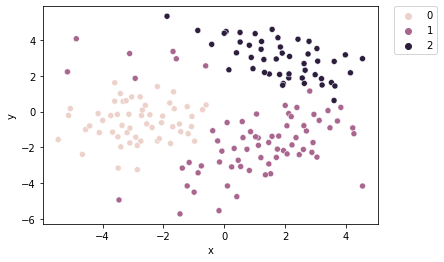

In [30]:
embedding = MDS(n_components=2)
    
Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'parental level of education': df23_drop2['target']})

sns.scatterplot(x='x', y='y', hue=df23_drop2['target'], data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

The grouping of target features is again quite good. Obvious clsuters of targer 0, 1 and 2 can be seen. Target feature 1 has a few outliers that are spread throughout the plot, but apart from this, the points are clsutered quite well.

$$\newline$$